In [1]:
from selenium import webdriver
import time
from PIL import Image
import cv2
import requests
driver = webdriver.Chrome('C:\\Users\\USER\Desktop\\test\\chromedriver.exe')

driver.implicitly_wait(60)
driver.get('https://portalx.yzu.edu.tw/PortalSocialVB/Login.aspx')

driver.save_screenshot('test.png')


element = driver.find_element_by_xpath("//iframe[@id='VeriCodePage']")

left = element.location['x']
right = element.location['x'] + element.size['width']
top = element.location['y']
bottom = element.location['y'] + element.size['height']

img = Image.open('test.png')
# img.show()
img = img.crop((left, top, right, bottom))

img.save('canCut.png', 'png')



driver.close()
# from PIL import Image

# image = Image.open('canCut.png')
# image

In [2]:
import PIL
import numpy
pil_image = PIL.Image.open('canCut.png').convert('RGB')
#pil_image = PIL.Image.open('C:\\Users\\USER\\Desktop\\test\\captua1.png').convert('RGB')
open_cv_image = numpy.array(pil_image)

Populating the interactive namespace from numpy and matplotlib


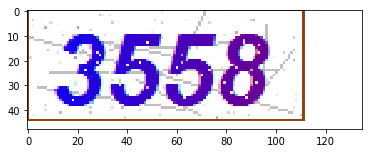

In [3]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

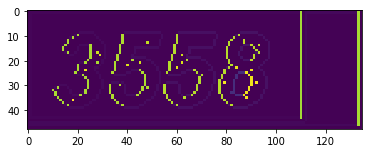

In [10]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key = lambda x:x[1])
plt.imshow(thresh)

In [5]:
ary =[]
for (c,_) in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print((x, y, w, h))
    if w >= 17 and h >=30 and h<=35:
    #if w >=15 and h >10:
        ary.append((x, y, w, h))

(1, 1, 133, 46)
(1, 1, 110, 43)
(10, 9, 22, 31)
(18, 36, 1, 1)
(23, 24, 1, 1)
(28, 17, 2, 2)
(33, 9, 22, 31)
(40, 22, 1, 1)
(45, 21, 1, 1)
(48, 13, 1, 1)
(55, 9, 22, 31)
(60, 23, 1, 1)
(62, 21, 1, 1)
(62, 18, 1, 1)
(77, 9, 21, 31)
(79, 29, 1, 1)
(82, 25, 9, 11)
(84, 23, 1, 1)
(85, 12, 9, 9)
(90, 24, 1, 1)
(92, 29, 1, 1)
(93, 14, 1, 1)


In [6]:
print(ary)

[(10, 9, 22, 31), (33, 9, 22, 31), (55, 9, 22, 31), (77, 9, 21, 31)]


Populating the interactive namespace from numpy and matplotlib


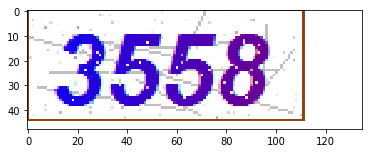

In [7]:
%pylab inline
plt.imshow(open_cv_image)

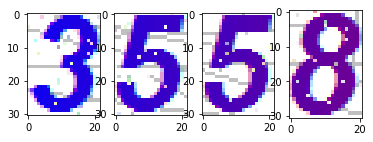

In [8]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x, y, w, h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

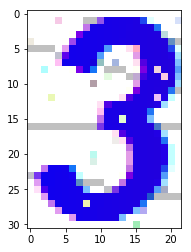

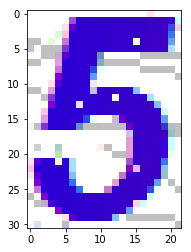

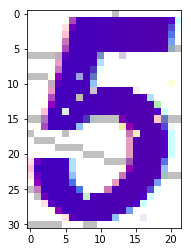

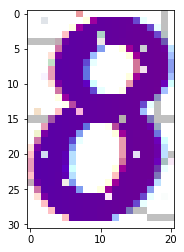

In [9]:
from matplotlib import pyplot as plt
for id, (x, y, w, h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('{}.png'.format(id+1), dpi=100)
  